# Import packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
train_data_dir = '../xray_images/chest_xray/train'
test_data_dir = '../xray_images/chest_xray/test'

train_generator = ImageDataGenerator().flow_from_directory(train_data_dir,
                                                          target_size=(512,512), batch_size=64)
test_generator = ImageDataGenerator().flow_from_directory(test_data_dir,
                                                          target_size=(512,512), batch_size=64)

X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

Found 5216 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


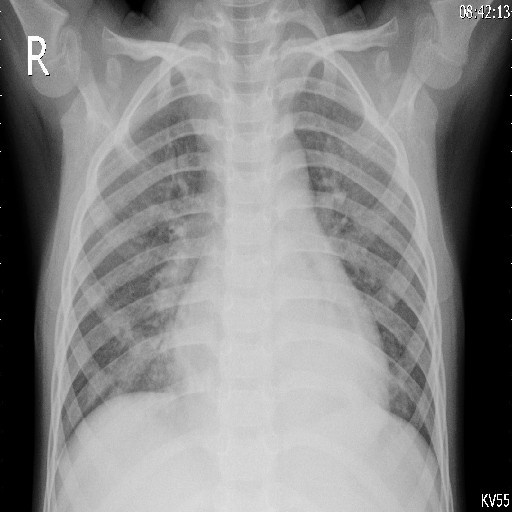

In [4]:
array_to_img(X_test[2])

In [5]:
X_train.shape

(64, 512, 512, 3)

In [6]:
X_train_unrow = X_train.reshape(64, -1)
np.shape(X_train_unrow)

(64, 786432)

In [13]:
X_test_unrow = X_test.reshape(64, -1)
feat_shape = X_test_unrow.shape[1]
feat_shape

786432

In [8]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA_BACTERIAL': 1, 'PNEUMONIA_VIRAL': 2}

In [9]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [10]:
# Standardize Image Data
X_train = X_train_unrow/255
X_test = X_test_unrow/255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(50, activation = 'tanh', input_shape = (feat_shape,)),
    Dropout(0.2),
    Dense(50, activation='tanh'),
    Dropout(0.2),
    Dense(3, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39321650  
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 39,324,353
Trainable params: 39,324,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(X_train, y_train, batch_size=10, epochs=4, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
score

Train on 64 samples, validate on 64 samples
Epoch 1/4
64/64 [==============================] - 5s 76ms/sample - loss: 1.2242 - acc: 0.1875 - val_loss: 1.0596 - val_acc: 0.3750
Epoch 2/4
64/64 [==============================] - 3s 53ms/sample - loss: 1.0478 - acc: 0.4688 - val_loss: 1.0801 - val_acc: 0.3750
Epoch 3/4
64/64 [==============================] - 3s 52ms/sample - loss: 1.0575 - acc: 0.5156 - val_loss: 1.1047 - val_acc: 0.3750
Epoch 4/4
64/64 [==============================] - 4s 58ms/sample - loss: 0.9995 - acc: 0.5625 - val_loss: 1.1415 - val_acc: 0.3750


[1.1415152549743652, 0.375]